In [1]:
from phomo import Master, Pool, Mosaic
from PIL import Image

/home/lcoyle/.cache/pypoetry/virtualenvs/phomo-pX3Qwu7w-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Face dataset from:

https://susanqq.github.io/UTKFace/

dl link: https://drive.google.com/drive/folders/0BxYys69jI14kU0I1YUQyY1ZDRUE?resourcekey=0-01Pth1hq20K4kuGVkp3oBw

Download and extract to `faces/` folder.

Dataset contains 9780 200x200 images of faces.

In [2]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))
pool

Loading tiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9780/9780 [00:04<00:00, 2260.07it/s]


phomo.pool.Pool at 0x7b605c07a630:
    len: 9780

# Master image:

A random face from the dataset

In [3]:
from pathlib import Path

master_file = list(Path("faces").glob('*'))[1534]

In [4]:
master = Master.from_file(master_file, img_size=(400, 400))
master

phomo.master.Master at 0x7b603dfa9fa0:
    shape: (400, 400, 3)

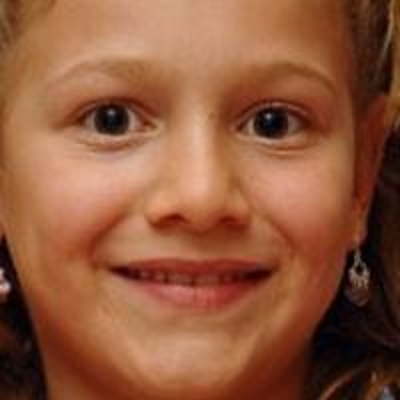

In [5]:
master.img

# Mosaic:

In [6]:
mosaic = Mosaic(master, pool)
mosaic

phomo.mosaic.Mosaic at 0x7b607d12c3e0:
    n_appearances: 1
    mosaic size: (400, 400)
    tile shape: (20, 20)
    leftover tiles: 9380
    phomo.grid.Grid at 0x7b605ffc78f0:
        origin: (0, 0)
        len slices: 400
        thresholds: []
    phomo.master.Master at 0x7b603dfa9fa0:
        shape: (400, 400, 3)
    phomo.pool.Pool at 0x7b605c07a630:
        len: 9780

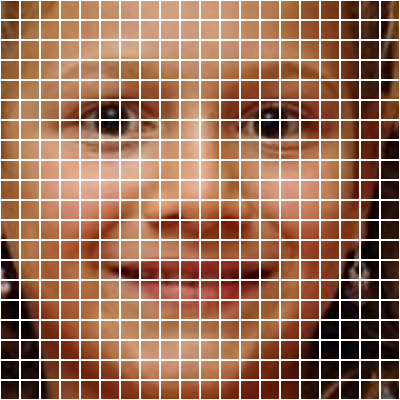

In [7]:
mosaic.grid.plot()

Building distance matrix: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:16<00:00, 23.69it/s]


dmatrix (400, 9780)


Building mosaic: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 236099.30it/s]


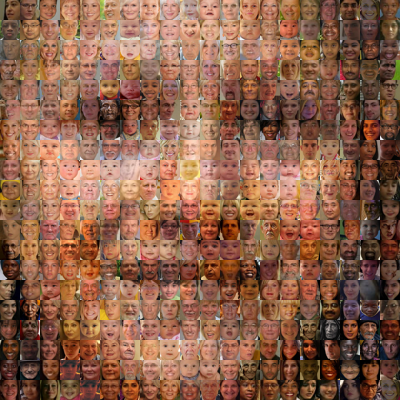

In [8]:
mosiac_img = mosaic.build(mosaic.d_matrix())
mosiac_img

Using PIL to blend the master with the mosaic to smooth out the jaggedness.

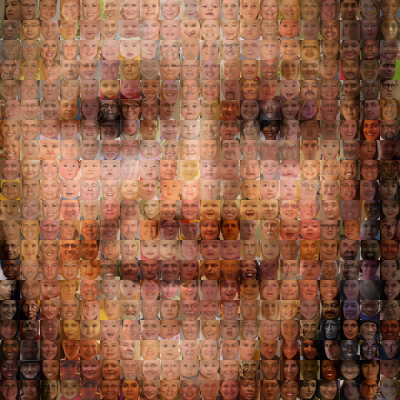

In [9]:
Image.blend(mosiac_img, master.img, 0.3)

# Subdivide tiles with higher contrast 

Loading tiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9780/9780 [00:04<00:00, 2071.26it/s]


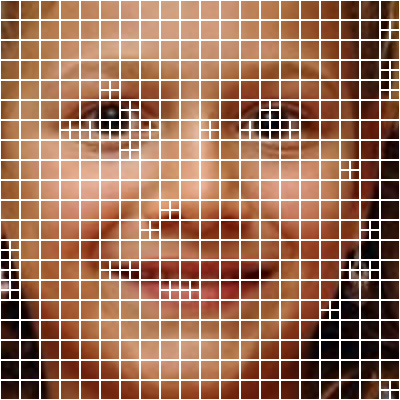

In [10]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))
master = Master.from_file(master_file, img_size=(400, 400))
mosaic = Mosaic(master, pool)
mosaic.grid.subdivide(0.1)
mosaic.grid.plot()

Building distance matrix: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 493/493 [00:20<00:00, 24.08it/s]


dmatrix (493, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 95722.24it/s]


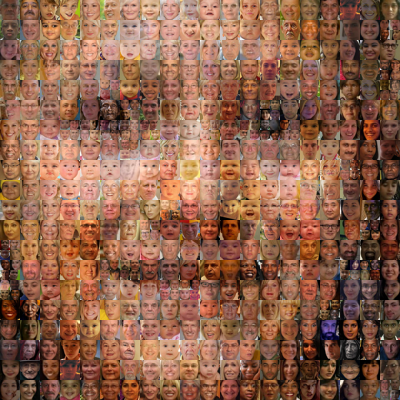

In [11]:
mosaic.build(mosaic.d_matrix())